In [128]:
import xml.etree.ElementTree as ET
import pandas as pd
from setuptools.command.rotate import rotate


def get_items(response):
    # 응답 데이터를 텍스트로 변환
    xml_string = response.text  # 또는 response.content.decode('utf-8')
    
    root = ET.fromstring(xml_string)
    item_list = []
    
    # 모든 row 엘리먼트 찾기
    rows = root.findall('row')
    
    # 각 row 엘리먼트에서 데이터 추출
    for row in rows:
        elements = row.findall('*')
        data = {}
        for element in elements:
            tag = element.tag.strip()
            text = element.text.strip() if element.text else None
            data[tag] = text
        item_list.append(data)
    
    return item_list

# items_list = get_items(res)
# items = pd.DataFrame(items_list)
# items.head()

In [129]:
import requests
import datetime
import certifi
import ssl

def get_data(statbl_id, datacycle_cd, cls_id):
    url = "https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?"
    service_key = "37f7a534514349d48f2cf77dc2691da3"
    

    call_code = "Key=" + service_key + "&" +\
        "pIndex=1&pSize=1000&" +\
        "STATBL_ID=" + statbl_id + "&" +\
        "DTACYCLE_CD=" + datacycle_cd +\
        "&START_WRTTIME=2024&END_WRTTIME=2025" +"&" +\
        "CLS_ID=" + cls_id
    
    print(url+call_code)
    res = requests.get(url + call_code, verify=certifi.where())
    return res

In [130]:
STATBL_ID = "T244183132827305"
cls_id_list = ["50115", "50116", "50117"]
#cls_id_list = ["500009"]
tx_list = []
for cls_id in cls_id_list:
    res = get_data(STATBL_ID, "WK", cls_id)
    tx_list += get_items(res)
    
len(tx_list)
apt_indi = pd.DataFrame(tx_list)
apt_indi

https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?Key=37f7a534514349d48f2cf77dc2691da3&pIndex=1&pSize=1000&STATBL_ID=T244183132827305&DTACYCLE_CD=WK&START_WRTTIME=2024&END_WRTTIME=2025&CLS_ID=50115
https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?Key=37f7a534514349d48f2cf77dc2691da3&pIndex=1&pSize=1000&STATBL_ID=T244183132827305&DTACYCLE_CD=WK&START_WRTTIME=2024&END_WRTTIME=2025&CLS_ID=50116
https://www.reb.or.kr/r-one/openapi/SttsApiTblData.do?Key=37f7a534514349d48f2cf77dc2691da3&pIndex=1&pSize=1000&STATBL_ID=T244183132827305&DTACYCLE_CD=WK&START_WRTTIME=2024&END_WRTTIME=2025&CLS_ID=50117


,STATBL_ID,DTACYCLE_CD,WRTTIME_IDTFR_ID,GRP_ID,GRP_NM,CLS_ID,CLS_NM,ITM_ID,ITM_NM,DTA_VAL,UI_NM,GRP_FULLNM,CLS_FULLNM,ITM_FULLNM,WRTTIME_DESC
0,T244183132827305,WK,202402,None,None,50115,덕양구,10001,지수,87.6387568485244,지수,None,경기>경의권>고양시>덕양구,지수,2024-01-08
1,T244183132827305,WK,202403,None,None,50115,덕양구,10001,지수,87.6337088397258,지수,None,경기>경의권>고양시>덕양구,지수,2024-01-15
2,T244183132827305,WK,202404,None,None,50115,덕양구,10001,지수,87.6379668139296,지수,None,경기>경의권>고양시>덕양구,지수,2024-01-22
3,T244183132827305,WK,202405,None,None,50115,덕양구,10001,지수,87.7608793201193,지수,None,경기>경의권>고양시>덕양구,지수,2024-01-29
4,T244183132827305,WK,202406,None,None,50115,덕양구,10001,지수,87.8249850319048,지수,None,경기>경의권>고양시>덕양구,지수,2024-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,T244183132827305,WK,202432,None,None,50117,일산서구,10001,지수,87.89778778478674,지수,None,경기>경의권>고양시>일산서구,지수,2024-08-05
101,T244183132827305,WK,202433,None,None,50117,일산서구,10001,지수,87.8966,지수,None,경기>경의권>고양시>일산서구,지수,2024-08-12
102,T244183132827305,WK,202434,None,None,50117,일산서구,10001,지수,87.93797697549837,지수,None,경기>경의권>고양시>일산서구,지수,2024-08-19
103,T244183132827305,WK,202435,None,None,50117,일산서구,10001,지수,87.95623182137457,지수,None,경기>경의권>고양시>일산서구,지수,2024-08-26


In [131]:
goyang_apt_indi = apt_indi.drop(['DTACYCLE_CD', 'STATBL_ID','GRP_ID','GRP_NM','CLS_ID','ITM_ID','UI_NM','GRP_FULLNM', 'CLS_FULLNM','ITM_FULLNM'], axis=1)
goyang_apt_indi.isnull().sum()

WRTTIME_IDTFR_ID    0
CLS_NM              0
ITM_NM              0
DTA_VAL             0
WRTTIME_DESC        0
dtype: int64

In [132]:
# 수치형식 변환
goyang_apt_indi['DTA_VAL'] = goyang_apt_indi['DTA_VAL'].astype(float)

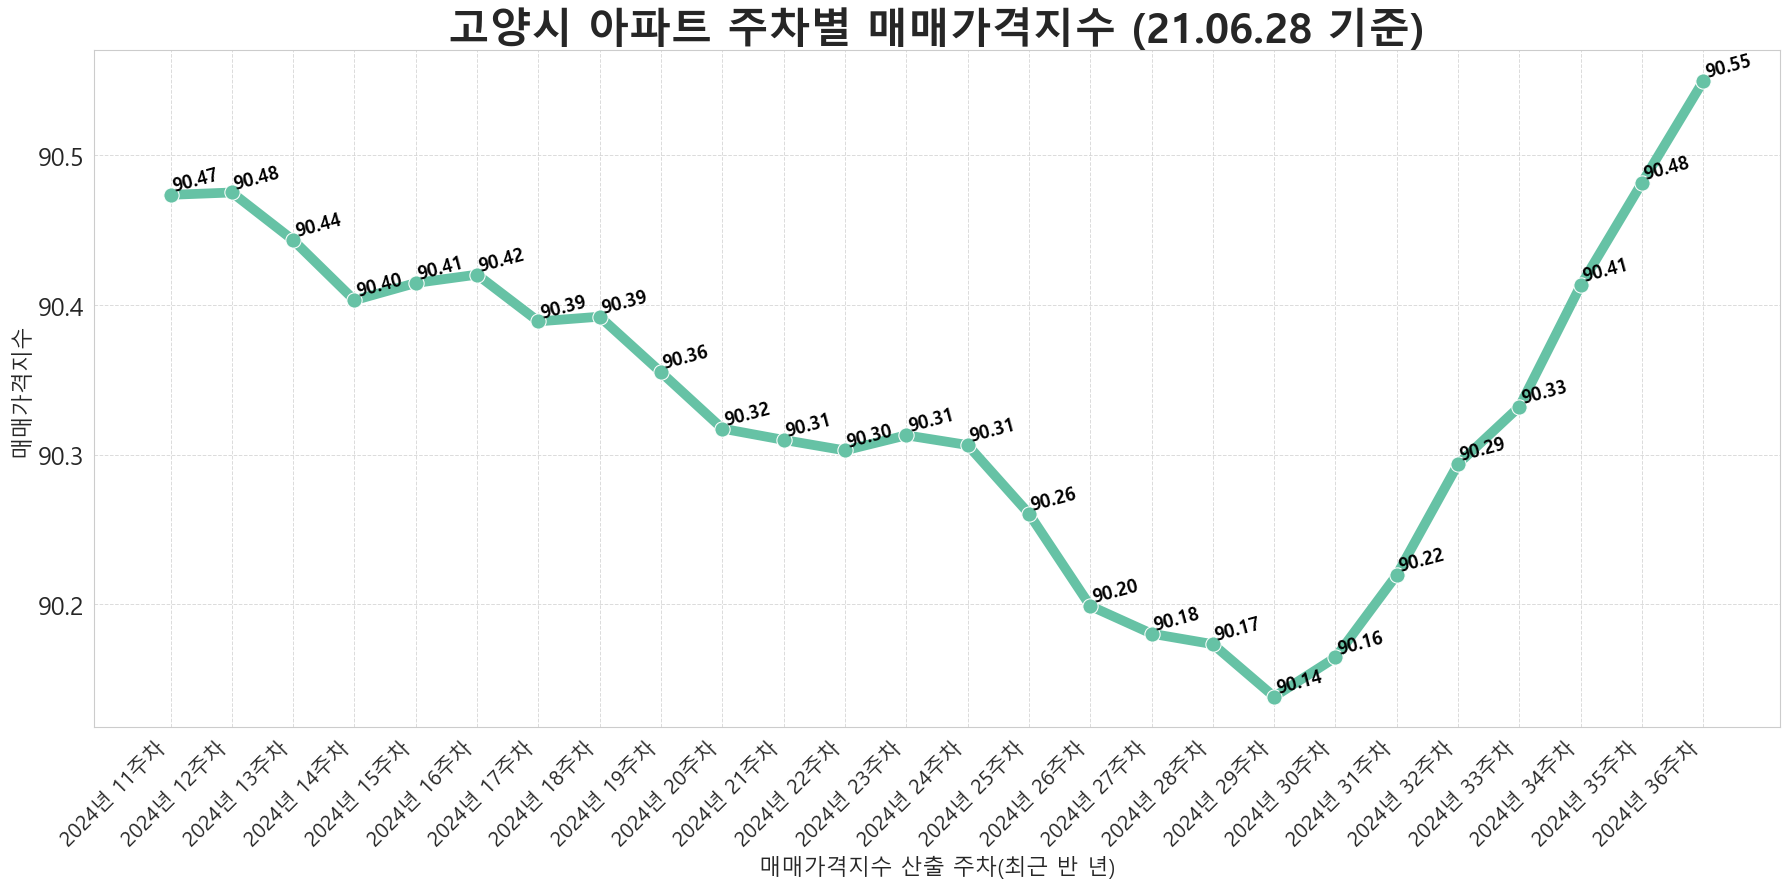

In [134]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
goyang_monthly_indi_wk = goyang_apt_indi.copy()
# 연도와 주차를 변환하는 함수
def convert_to_year_week(week_code):
    year = int(week_code[:4])
    week = int(week_code[4:])
    # 'year'년 'week'주차로 변환
    return f'{year}년 {week}주차'

#각 지역구 그룹화
monthly_avg_indi_wk = goyang_monthly_indi_wk.groupby('WRTTIME_IDTFR_ID')['DTA_VAL'].mean().reset_index()

# 변환 적용
monthly_avg_indi_wk['Formatted_Week'] = monthly_avg_indi_wk['WRTTIME_IDTFR_ID'].apply(convert_to_year_week)

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=monthly_avg_indi_wk, x='Formatted_Week', y='DTA_VAL', marker='o', markersize = 11, linewidth=7)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 주차별 매매가격지수 (21.06.28 기준)', fontsize=30, weight='bold')
plt.xlabel('매매가격지수 산출 주차(최근 반 년)', fontsize=16)
plt.ylabel('매매가격지수', fontsize=16)

# 날짜 포맷 설정
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
#plt.axhline(y=100, color='gray', linestyle='--', linewidth=1)

# 레이아웃 조정
plt.tight_layout()

# 각 데이터 포인트 위에 평균 거래금액 표시
for i in range(len(monthly_avg_indi_wk)):
    plt.text(monthly_avg_indi_wk['Formatted_Week'].iloc[i], 
             monthly_avg_indi_wk['DTA_VAL'].iloc[i], 
             f'{monthly_avg_indi_wk["DTA_VAL"].iloc[i]:,.2f}', 
             ha='left', va='bottom', fontsize=13, color='black', fontweight='bold', rotation=15)

# 그래프 표시
plt.show()

In [133]:
goyang_apt_indi = goyang_apt_indi.sort_values(by='WRTTIME_IDTFR_ID', ascending=False)
goyang_apt_indi = goyang_apt_indi.head(78)

In [135]:
goyang_monthly_indi_wk_gu

,WRTTIME_IDTFR_ID,CLS_NM,ITM_NM,DTA_VAL,WRTTIME_DESC,Formatted_Week
104,202436,일산서구,지수,87.980613,2024-09-02,2024년 36주차
34,202436,덕양구,지수,89.837993,2024-09-02,2024년 36주차
69,202436,일산동구,지수,93.830931,2024-09-02,2024년 36주차
68,202435,일산동구,지수,93.697750,2024-08-26,2024년 35주차
103,202435,일산서구,지수,87.956232,2024-08-26,2024년 35주차
...,...,...,...,...,...,...
10,202412,덕양구,지수,88.313123,2024-03-18,2024년 12주차
45,202412,일산동구,지수,94.369012,2024-03-18,2024년 12주차
9,202411,덕양구,지수,88.203829,2024-03-11,2024년 11주차
44,202411,일산동구,지수,94.426578,2024-03-11,2024년 11주차


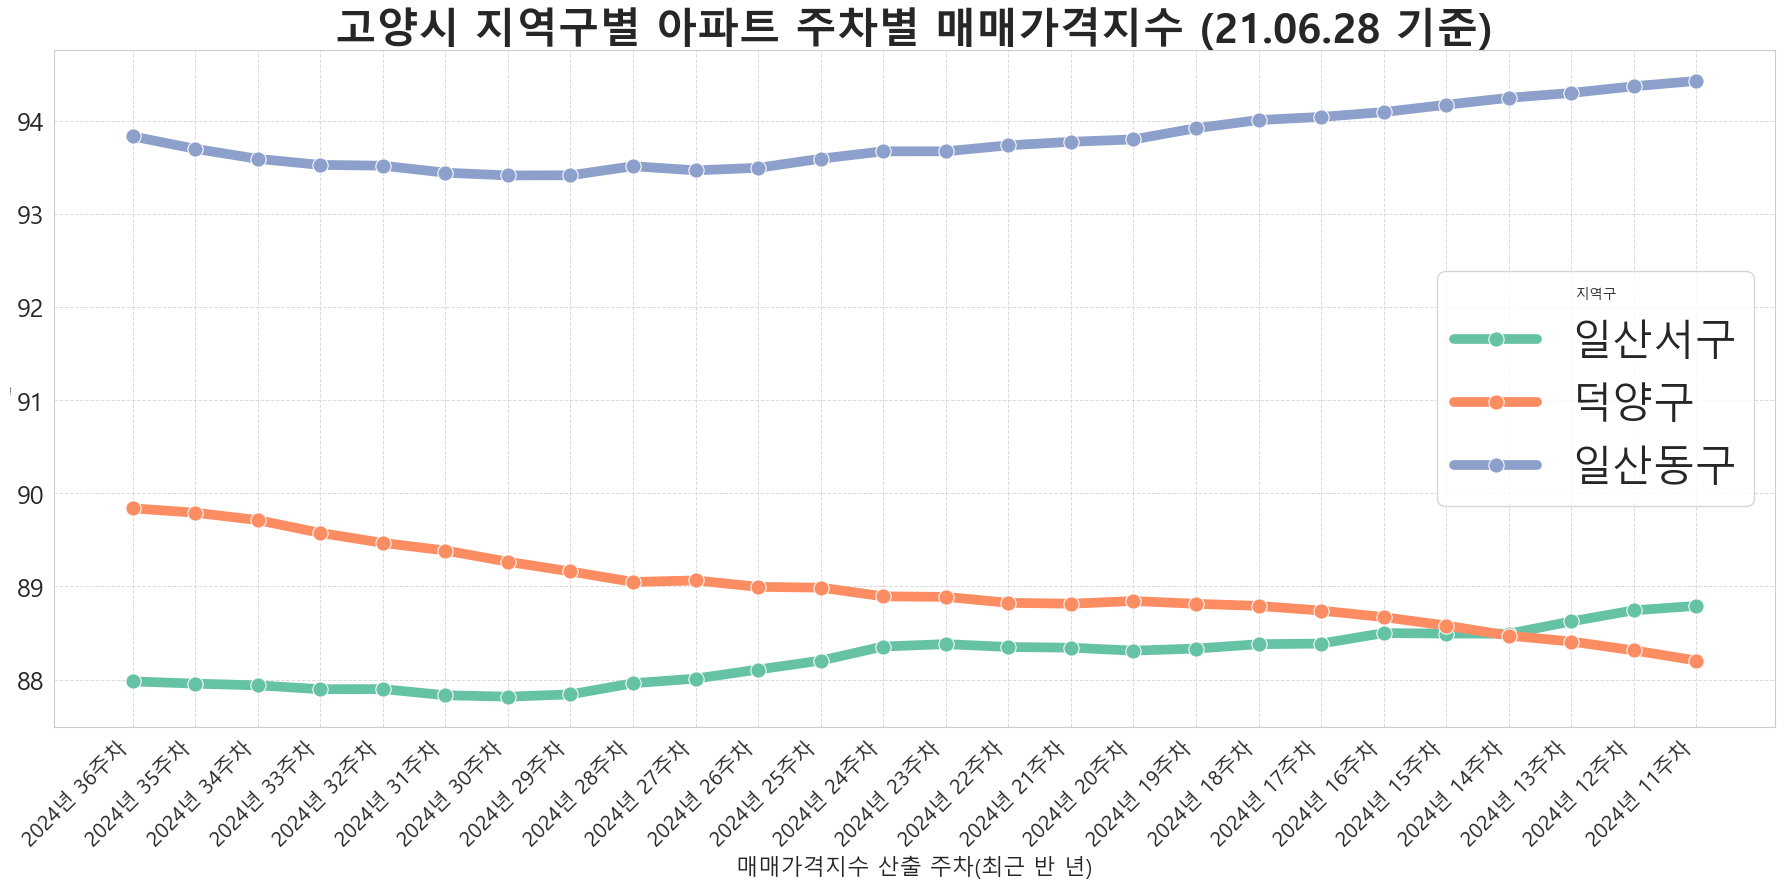

In [136]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 데이터 전처리
goyang_monthly_indi_wk_gu = goyang_apt_indi.copy()

# 연도와 주차를 변환하는 함수
def convert_to_year_week(week_code):
    year = int(week_code[:4])
    week = int(week_code[4:])
    # 'year'년 'week'주차로 변환
    return f'{year}년 {week}주차'

# 변환 적용
goyang_monthly_indi_wk_gu['Formatted_Week'] = goyang_monthly_indi_wk_gu['WRTTIME_IDTFR_ID'].apply(convert_to_year_week)

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
#sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=goyang_monthly_indi_wk_gu, x='Formatted_Week', y='DTA_VAL', hue='CLS_NM', marker='o', markersize = 11, linewidth=7, palette='Set2')

# 제목과 축 레이블 설정
plt.title('고양시 지역구별 아파트 주차별 매매가격지수 (21.06.28 기준)', fontsize=30, weight='bold')
plt.xlabel('매매가격지수 산출 주차(최근 반 년)', fontsize=16)
plt.ylabel('매매가격지수', fontsize=1)

# 날짜 포맷 설정
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
#plt.axhline(y=100, color='gray', linestyle='--', linewidth=1)

plt.legend(title='지역구', fontsize=30)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()


posx and posy should be finite values
posx and posy should be finite values


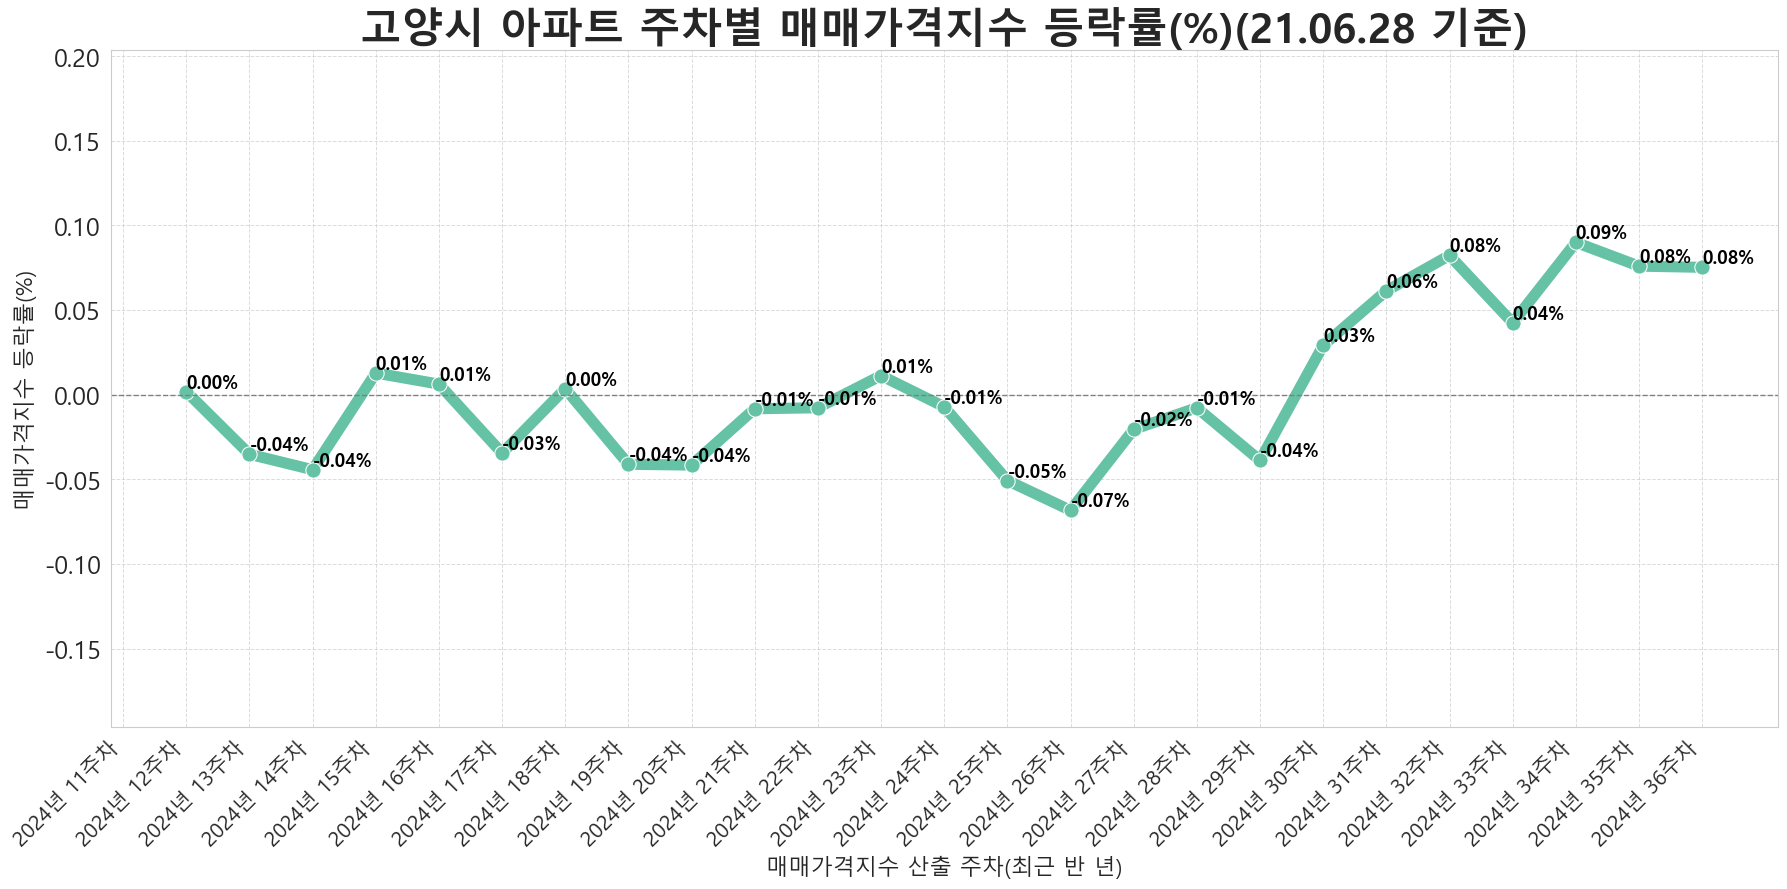

In [139]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False


# 데이터 전처리
goyang_weekly_indi_change = goyang_apt_indi.copy()
# goyang_weekly_indi_change['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_weekly_indi_change['WRTTIME_IDTFR_ID'], format='%Y%m')

weekly_avg_indi_change = goyang_weekly_indi_change.groupby('WRTTIME_IDTFR_ID')['DTA_VAL'].mean().reset_index()

# 연도와 주차를 변환하는 함수
def convert_to_year_week(week_code):
    year = int(week_code[:4])
    week = int(week_code[4:])
    # 'year'년 'week'주차로 변환
    return f'{year}년 {week}주차'

# 변환 적용
weekly_avg_indi_change['Formatted_Week'] = weekly_avg_indi_change['WRTTIME_IDTFR_ID'].apply(convert_to_year_week)

# 전월 대비 등락률 계산
weekly_avg_indi_change = weekly_avg_indi_change.sort_values('WRTTIME_IDTFR_ID')
weekly_avg_indi_change['prev_valAmount'] = weekly_avg_indi_change['DTA_VAL'].shift(1)
weekly_avg_indi_change['change_rate'] = (weekly_avg_indi_change['DTA_VAL'] - weekly_avg_indi_change['prev_valAmount']) / weekly_avg_indi_change['prev_valAmount'] * 100

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=weekly_avg_indi_change, x='Formatted_Week', y='change_rate', marker='o', markersize = 11, linewidth=8)

# 제목과 축 레이블 설정
plt.title('고양시 아파트 주차별 매매가격지수 등락률(%)(21.06.28 기준)', fontsize=30, weight='bold')
plt.xlabel('매매가격지수 산출 주차(최근 반 년)', fontsize=16)
plt.ylabel('매매가격지수 등락률(%)', fontsize=16)

# 날짜 포맷 설정
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

avg = weekly_avg_indi_change['change_rate'].mean()
avg
# y축 범위 설정 (최소값, 최대값)
plt.ylim(avg-0.2, avg+0.2)

# 그래프 위에 등락률 수치 추가
for i in range(len(weekly_avg_indi_change)):
    plt.text(weekly_avg_indi_change['Formatted_Week'].iloc[i], weekly_avg_indi_change['change_rate'].iloc[i], 
             f'{weekly_avg_indi_change["change_rate"].iloc[i]:.2f}%', 
             ha='left', va='bottom', fontsize=13, fontweight='bold',color='black')


# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()

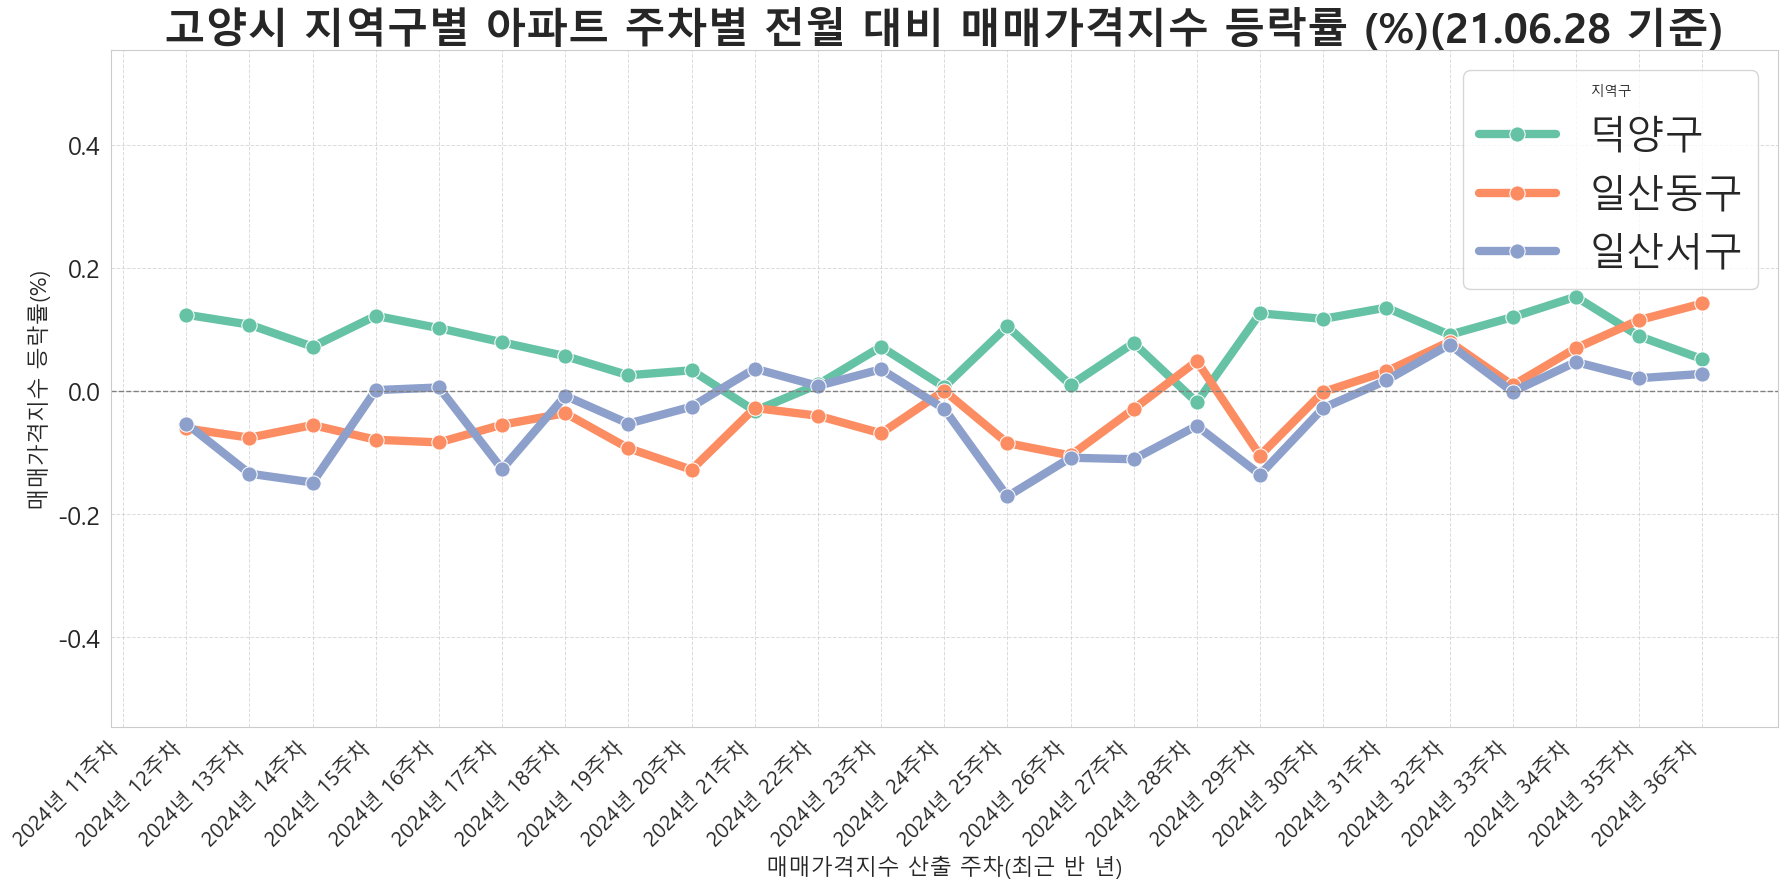

In [142]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns
import matplotlib.dates as mdates
import pandas as pd

# 한글 폰트 설정
font_path = "C:/Windows/Fonts/malgun.ttf"  # 사용할 폰트 경로 삽입
font = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리
goyang_weekly_indi_change_gu = goyang_apt_indi.copy()
# goyang_weekly_indi_change_gu['WRTTIME_IDTFR_ID'] = pd.to_datetime(goyang_weekly_indi_change_gu['WRTTIME_IDTFR_ID'], format='%Y%m')

# 연도와 주차를 변환하는 함수
def convert_to_year_week(week_code):
    year = int(week_code[:4])
    week = int(week_code[4:])
    # 'year'년 'week'주차로 변환
    return f'{year}년 {week}주차'

# 변환 적용

weekly_avg_indi_change_gu = goyang_weekly_indi_change_gu.groupby(['WRTTIME_IDTFR_ID', 'CLS_NM'])['DTA_VAL'].mean().reset_index()

weekly_avg_indi_change_gu['Formatted_Week'] = weekly_avg_indi_change_gu['WRTTIME_IDTFR_ID'].apply(convert_to_year_week)

# 전월 대비 등락률 계산
weekly_avg_indi_change_gu = weekly_avg_indi_change_gu.sort_values(['CLS_NM', 'WRTTIME_IDTFR_ID'])
weekly_avg_indi_change_gu['prev_valAmount'] = weekly_avg_indi_change_gu.groupby('CLS_NM')['DTA_VAL'].shift(1)
weekly_avg_indi_change_gu['change_rate'] = (weekly_avg_indi_change_gu['DTA_VAL'] - weekly_avg_indi_change_gu['prev_valAmount']) / weekly_avg_indi_change_gu['prev_valAmount'] * 100

# 그래프 설정
plt.figure(figsize=(18, 9))

# 스타일 및 색상 설정
#sns.set_palette("Set2")  # 부드러운 색상 팔레트 사용
sns.lineplot(data=weekly_avg_indi_change_gu, x='Formatted_Week', y='change_rate', hue='CLS_NM', marker='o', markersize = 11, linewidth=6, palette='Set2')

# 제목과 축 레이블 설정
plt.title('고양시 지역구별 아파트 주차별 전월 대비 매매가격지수 등락률 (%)(21.06.28 기준)', fontsize=30, weight='bold')
plt.xlabel('매매가격지수 산출 주차(최근 반 년)', fontsize=16)
plt.ylabel('매매가격지수 등락률(%)', fontsize=16)

# 날짜 포맷 설정
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y년 %m월'))
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# X축과 Y축 눈금 글자 크기 설정
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=18)

# 눈금선 추가 및 스타일 설정
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Y축 0에 가로선 추가
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)

avg_gu = weekly_avg_indi_change_gu['change_rate'].mean()
avg_gu
# y축 범위 설정 (최소값, 최대값)
plt.ylim(avg-0.55, avg+0.55)

plt.legend(title='지역구', fontsize=28)

# 레이아웃 조정
plt.tight_layout()

# 그래프 표시
plt.show()
